In [1]:
# Import relevant libraries
#%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Read the ride_data and city_data csv files into pandas dataframes. 
ride_df = pd.read_csv("raw_data/ride_data.csv")
city_df = pd.read_csv("raw_data/city_data.csv")
print(ride_df.head(3))
print(city_df.head(3))
#ride_city_df.dtypes

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban


In [3]:
#Merge the two dataframes on city.
ride_city_df = pd.merge(ride_df,city_df,on="city")
ride_city_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


In [4]:
#Count of rides per city
ride_city_df_group = ride_city_df.groupby("city")
ride_city_df_ridecnt = ride_city_df_group["ride_id"].count()
ride_city_df_ridecnt.head(5)


city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [5]:
#number of rides per city 
ride_df_groupbycity = ride_df.groupby("city")
ride_df_ride_cnt = ride_df_groupbycity["ride_id"].count()
ride_df_ride_cnt.head(10)

city
Amandaburgh        18
Barajasview        22
Barronchester      16
Bethanyland        18
Bradshawfurt       10
Brandonfort        19
Carriemouth        27
Christopherfurt    27
Colemanland        22
Davidfurt          17
Name: ride_id, dtype: int64

In [6]:
#average fare per city
ride_df_averagefare = ride_df_groupbycity["fare"].mean()
ride_df_averagefare.head(10)


city
Amandaburgh        24.641667
Barajasview        25.332273
Barronchester      36.422500
Bethanyland        32.956111
Bradshawfurt       40.064000
Brandonfort        35.437368
Carriemouth        28.314444
Christopherfurt    24.501852
Colemanland        30.894545
Davidfurt          31.995882
Name: fare, dtype: float64

In [7]:
# Number of drivers per city
city_df_groupbycity = city_df.groupby("city")
city_df_drivercnt = city_df_groupbycity["driver_count"].sum()
city_df_drivercnt.head(5)

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [8]:
city_df_type = city_df[["city","type"]]

city_df_type = city_df_type.set_index("city")
city_df_type.head()

,type
city,
Richardfort,Urban
Williamsstad,Urban
Port Angela,Urban
Rodneyfort,Urban
West Robert,Urban


In [9]:
city_df_type["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

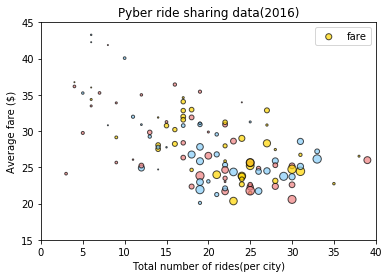

In [10]:
#plot the values determined above as a bubble chart.
plt.scatter(ride_city_df_ridecnt,ride_df_averagefare,s=city_df_drivercnt,alpha=0.7,
            marker='o',facecolors=["gold","Lightskyblue","Lightcoral"],edgecolors=["black"])
            
##plt.scatter(ride_city_df_ridecnt,ride_df_averagefare,marker='o',facecolors=["gold","Lightskyblue","Lightcoral"],
##            s=city_df_drivercnt,alpha=0.5)
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
plt.xlim(0,40)
plt.ylim(15,45)
#plt.tight_layout()
plt.title("Pyber ride sharing data(2016)")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average fare ($)")
plt.legend(loc='upper right')
#plt.hlines(0, 0, 10, alpha=0.25)   
#Wedge percentages
#Wedge labels
plt.show()

In [11]:
#Determine  % of total fares by city type
ride_city_df2 = ride_city_df
ride_city_df2_totalsbytype = ride_city_df2.groupby("type")["fare"].sum()
ride_city_df2_totalsbytype
#total_alltypes = ride_city_df2_totalsbytype.sum()
#total_alltypes 
#ride_city_typepercent = (ride_city_df2_totalsbytype / total_alltypes) * 100
#ride_city_typepercent

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

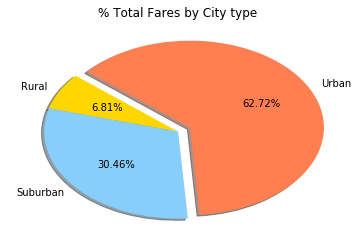

In [28]:
#Create and show  pie chart for Total fares by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.pie(ride_city_df2_totalsbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% Total Fares by City type")
plt.show()

In [17]:
#Determine Total rides by city type.
ride_city_df3 = ride_city_df
ride_city_df2_totalridesbytype = ride_city_df2.groupby("type")["ride_id"].count()
ride_city_df2_totalridesbytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

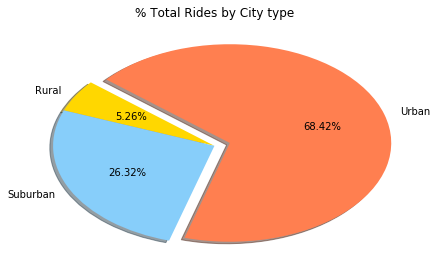

In [27]:
#Create and show  pie chart for Total rides by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.pie(ride_city_df2_totalridesbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% Total Rides by City type")
plt.tight_layout()
plt.show()

In [23]:
#Determine Drivers rides by city type.
city_df2 = city_df
city_df2_drivercntbytype = city_df2.groupby("type")["driver_count"].sum()
city_df2_drivercntbytype 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

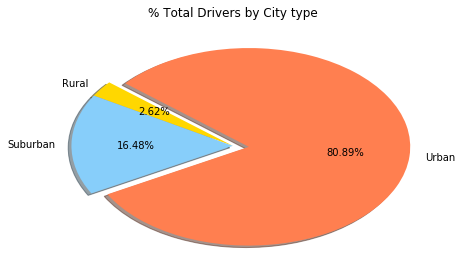

In [26]:
#Create and show  pie chart for Total rides by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.pie(city_df2_drivercntbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% Total Drivers by City type")
plt.tight_layout()
plt.show()